# correlation of different gas grades
## Objective

This notebook anaylyzes the correlation and difference in price for Regular, Midgrade, and Premuim gas.

## Data Loading and Preprocessing
- **Data Sources**: We utilized three CSV files containing data on Regular, Midgrade, and Premium gasoline prices.
- **Preprocessing Steps**:
  - loading dta from csv files and removing any unnecessary and unused columns.
  - Assign meaningful column names based on the data structure.
  - Convert the 'Date' column to datetime format for better manipulation.
  - Add a column that takes the year from the 'Date' column to make its own feature called 'Year'.
  - Take the mean of each year to add to a list.

## Analysis Overview
- **Average Price Calculation**:
  - Compute the average price for each year across all years for each type of gasoline.
- **Correlation Between Gas Grades**:
  - Computed the correlation between regular to midgrade and regular to premuim.
- **Difference Between Gasoline Grades calculation**
  - Computed the difference between regular to midgrade and regular to premuim for each year
- **Visualization**:
  - Created a graph that showed each grade of gasoline's annual average from the years 1994-present
  - Created a graph that showed the difference between midgrade and premuim to regular.

## Results
- **Comparison Across Gasoline Grades**:
  - Regular, Midgrade, and Premium gasoline prices all followed similar annual patterns, with Premium gasoline consistently being the most expensive and Regular the least.
- **Correlation Between Gas Grades**
  - The correlation between gas grades was greater than a .98 indicating a strong correlation between each gas grade.
- **Difference of Price Between Gasoline Grades**:
  - The Difference between gas prices is pretty similar from years 1994-2010.
  - Then the difference between premuim and regular increased faster than midgrade to regular from 2010-present


## Conclusion
- Gas price grades tend to increase at the same rate together due to the fact that they undergo similar processes. However, The difference between grades has increased due to more demand for higher gas grades and inflation.


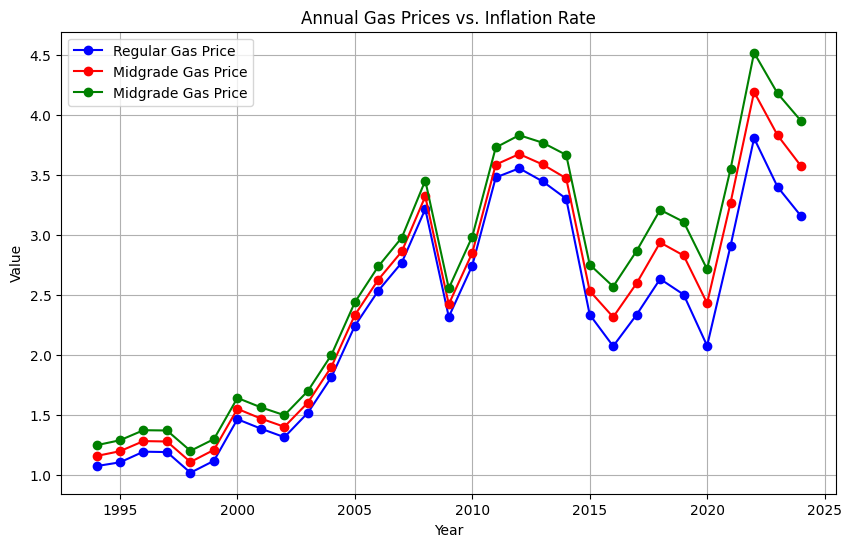

In [24]:
import pandas as pd
import matplotlib.pyplot as plt



def load_and_preprocess(file_path, gas_grade):
    new_headers = ['Date', gas_grade]
    df = pd.read_csv(file_path, header=2)
    df = df.iloc[:-1, :2]

    df.columns = new_headers
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df = df.groupby('Year')[gas_grade].mean()
    return df

average_regular_gas_price_yearly = load_and_preprocess("Data/Data1_Regular_Conventional.csv", "Regular Gas Price")
average_midgrade_gas_price_yearly = load_and_preprocess("Data/Data4_Midgrade_Conventional.csv", "Midgrade Gas Price")
average_premuim_gas_price_yearly = load_and_preprocess("Data/Data7_Premuim_Conventional.csv", "Premuim Gas Price")

# Merge the Data
merged_df = pd.merge(average_regular_gas_price_yearly, average_midgrade_gas_price_yearly, on='Year', how='inner')
merged_df = merged_df.reset_index()
merged_df = pd.merge(merged_df, average_premuim_gas_price_yearly, on='Year', how='inner')
merged_df = merged_df.reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Regular Gas Price'], label='Regular Gas Price', color='blue', marker='o')
plt.plot(merged_df['Year'], merged_df['Midgrade Gas Price'], label='Midgrade Gas Price', color='red', marker='o')
plt.plot(merged_df['Year'], merged_df['Premuim Gas Price'], label='Midgrade Gas Price', color='green', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Annual Gas Prices vs. Inflation Rate')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [25]:
correlation_coefficient = merged_df['Regular Gas Price'].corr(merged_df['Midgrade Gas Price'])
print("Correlation Coefficient between Regular and Midgrade:", correlation_coefficient)

correlation_coefficient = merged_df['Regular Gas Price'].corr(merged_df['Premuim Gas Price'])
print("Correlation Coefficient between Regular and Premuim:", correlation_coefficient)

Correlation Coefficient between Regular and Midgrade: 0.9942061405709478
Correlation Coefficient between Regular and Premuim: 0.9852402948143363


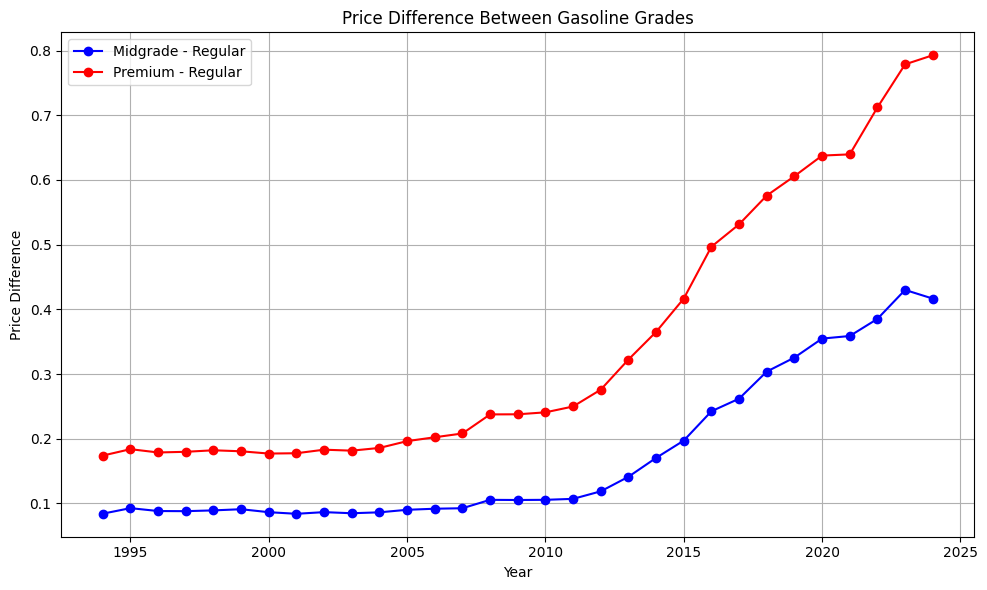

In [26]:
price_difference = average_midgrade_gas_price_yearly - average_regular_gas_price_yearly
price_difference_premium = average_premuim_gas_price_yearly - average_regular_gas_price_yearly

# Plot the differences
plt.figure(figsize=(10, 6))
plt.plot(price_difference.index, price_difference, label='Midgrade - Regular', color='blue', marker='o')
plt.plot(price_difference_premium.index, price_difference_premium, label='Premium - Regular', color='red', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Difference')
plt.title('Price Difference Between Gasoline Grades')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()